# Importing Packages & Setting Color Palette

In [134]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import networkx as nx
from matplotlib.pyplot import figure


%matplotlib inline
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("darkgrid", {"axes.facecolor": ".93"})

palette = [ '#00BFC4' ,'#F8766D', '#0085C7', '#000000', "#FFCE54", '#A1469E']
sns.set_palette(palette)

# Loading & Viewing the Data

In [2]:
# Dataset: https://www.kaggle.com/CooperUnion/anime-recommendations-database


anime = pd.read_csv(r'C:\Users\Ferdous Hasan\Downloads\DATA DATA DATA (BA)\anime.csv')
rating = pd.read_csv(r'C:\Users\Ferdous Hasan\Downloads\DATA DATA DATA (BA)\rating.csv')

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
print(anime.columns)

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


In [5]:
print(rating.columns)

Index(['user_id', 'anime_id', 'rating'], dtype='object')


In [15]:
# 25th Percentile
def q25(x):
    return x.quantile(0.25)

# 75th Percentile
def q75(x):
    return x.quantile(0.75)

percetile_25 = q25(anime['rating'])
percetile_75 = q75(anime['rating'])
mean = anime['rating'].mean()
median = anime['rating'].median()

C:\Users\Ferdous Hasan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


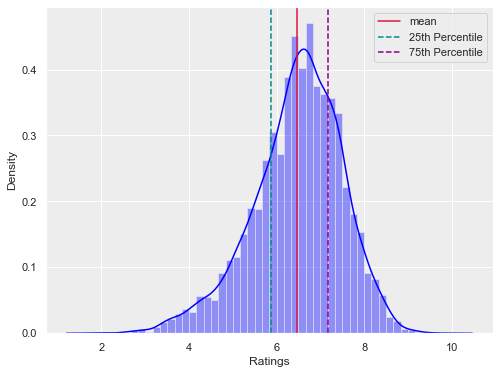

In [17]:
# make a side by side comparision of the rating of people

sns.distplot(anime.rating, color = 'blue').set(xlabel= 'Ratings')

plt.axvline(mean, 0,1, color = '#DC143C' , label = 'mean')
plt.axvline(percetile_25, 0,1, color = '#008B8B' , linestyle="--", label = '25th Percentile')
plt.axvline(percetile_75, 0,1, color = '#8B008B', linestyle="--", label = '75th Percentile')

plt.legend(loc='upper right')

plt.savefig('Rating_Variable', dpi = 300)

In [16]:
print(mean)
print(median)
print(percetile_25)
print(percetile_75)

6.473901690981445
6.57
5.88
7.18


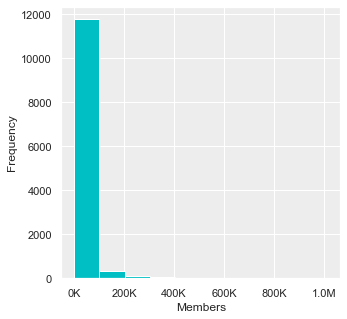

In [60]:
def format_number(data_value, indx):
    if data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000_001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter 

fig, ax = plt.subplots(figsize = (5,5))
plt.hist(anime.members)
ax.xaxis.set_major_formatter(format_number)

plt.xlabel('Members')
plt.ylabel('Frequency')

plt.savefig('Member_Dist_Raw', dpi = 300)

In [77]:
percetile_25 = q25(anime['members'])
percetile_75 = q75(anime['members'])
mean = anime['members'].mean()
median = anime['members'].median()

print(mean)
print(median)
print(percetile_25)
print(percetile_75)

18071.33886448674
1550.0
225.0
9437.0


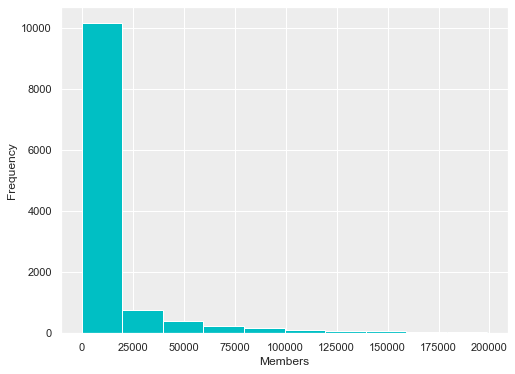

In [79]:
most_anime = anime.loc[anime['members'] <= 200000]

plt.hist(most_anime.members)
plt.xlabel('Members')
plt.ylabel('Frequency')

plt.savefig('Member_Dist_Focused', dpi = 300)

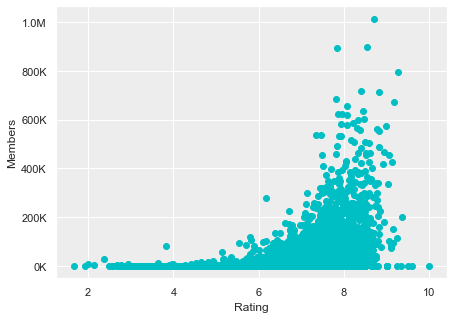

In [59]:
fig, ax = plt.subplots(figsize = (7,5))

plt.scatter(anime.rating, anime.members)
ax.yaxis.set_major_formatter(format_number)
plt.xlabel('Rating')
plt.ylabel('Members')


plt.savefig('Rating_vs_Members', dpi = 300)

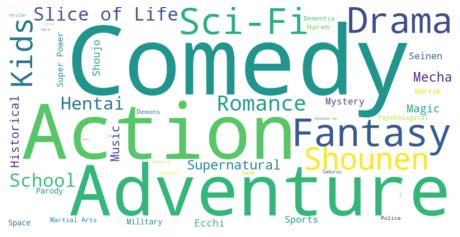

In [90]:
anime_2 = anime.copy()
anime_2.dropna(inplace=True)

from collections import defaultdict
all_genres = defaultdict(int)

for genres in anime_2['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('Genre_Word_Cloud', dpi = 300)

In [163]:
def count_genres(df):
    amount_of_genres = []
    df['genre'] = df['genre'].astype(str)
    for genre in df['genre']:
        if genre != 'NaN':
            count = len(genre.split(','))
            amount_of_genres.append(count)
        else:
            amount_of_genres.append(-1)
    return amount_of_genres

anime['Number_Genres'] = count_genres(anime)

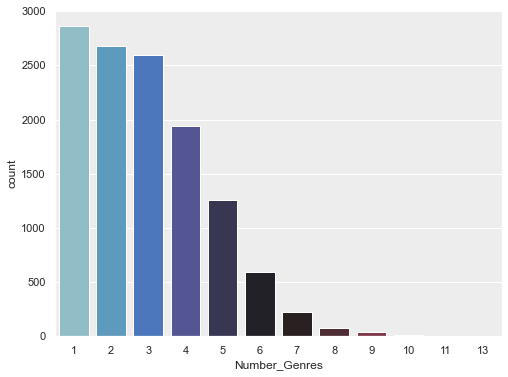

In [201]:
sns.countplot(x="Number_Genres", data=anime, palette="icefire")
plt.savefig('Number_Genres', dpi = 300)

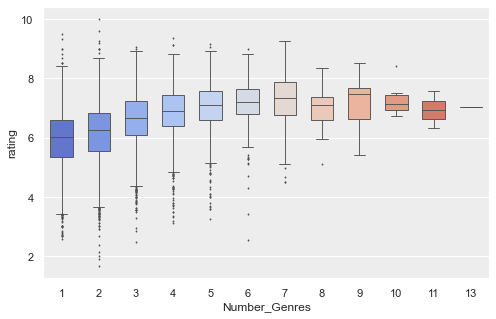

In [205]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.boxplot(x="Number_Genres", y="rating", data=anime, palette = 'coolwarm', width=0.6, fliersize=1, linewidth=0.9)

plt.savefig('Number_Genres_Rating', dpi = 300)

# Data Cleaning & Transformation

In [9]:
rating.rating.unique()

array([-1, 10,  8,  6,  9,  7,  3,  5,  4,  1,  2], dtype=int64)

In [10]:
rating['rating'].value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [11]:
df = pd.merge(anime,rating,on='anime_id',suffixes= ['', '_user'])
df = df.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
df.tail()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1
7813726,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,48766,-1


In [12]:
df.shape[0]

7813727

# Exploratory Analysis

# ML